In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from SVM import SVM

X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

SVM classification accuracy 1.0


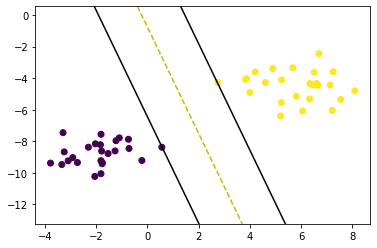

In [4]:
def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, clf.weights, clf.bias, 0)
x1_2 = get_hyperplane_value(x0_2, clf.weights, clf.bias, 0)

x1_1_m = get_hyperplane_value(x0_1, clf.weights, clf.bias, -1)
x1_2_m = get_hyperplane_value(x0_2, clf.weights, clf.bias, -1)

x1_1_p = get_hyperplane_value(x0_1, clf.weights, clf.bias, 1)
x1_2_p = get_hyperplane_value(x0_2, clf.weights, clf.bias, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()